<html lang="en">
<body>
<br>
<font face="verdana" size="6" color="red"><center> Medical Appointment No Shows</center></font>
</body>
</html>

<html lang="en">
<body>
<br>
<font face="verdana" size="4" color="blue"> The data has 110.527 medical appointments its 14 associated variables (characteristics).
The most important one if the patient show-up or no-show to the appointment.</font>
<p><br>
<font face="verdana" size="4" color="blue"> Data Dictionary:</font>
<\p>
 <p>
    <ol>
      <font face="verdana" size="4" color="blue">
      <li>PatientId: Identification of a patient</li>        
      <li>AppointmentID: Identification of each appointment</li>
      <li>Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</li>
       <li> AppointmentDay: The day of the actuall appointment, when they have to visit the doctor </li>
       <li> ScheduledDay: The day someone called or registered the appointment, this is before appointment of course </li>
       <li> Age: How old is the patient</li>
       <li> Neighbourhood: Where the appointment takes place</li>
       <li> Scholarship: True of False </li>
       <li> Hipertension: True or False </li>
       <li> Diabetes: True or False</li>
       <li> Alcoholism: True or False</li>
       <li> Handcap: True or False</li>
       <li> SMS_received: 1 or more messages sent to the patient</li>
       <li> No-show: True or False</li>
     </font></ol><\p>
</body>
</html>

<html lang="en">
<body>
<p><br><font face="verdana" size="5" color="blue"><center> The research question: </center></font><\p>
<p><font face="verdana" size="5" color="red"><center> Why do 30% of patients miss their scheduled appointments?</center></font>
<\p>
</body>
</html>

# **Load Libraries**
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from scipy.stats import jarque_bera
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine
import researchpy as rp
import datetime
import warnings

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

# **Import Dataset**
---

In [2]:
med_app = pd.read_csv("KaggleV2-May-2016.csv",parse_dates=['ScheduledDay','AppointmentDay'])
med_app.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

# **Understanding the Data**
---

In [3]:
med_app.shape

(110527, 14)

In [4]:
med_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
pd.crosstab(index=med_app['No-show'],columns='count')

col_0    count
No-show       
No       88208
Yes      22319

In [6]:
for var in med_app.columns[[7,8,9,10,12]]: 
     med_app[var]=med_app[var].replace([0,1],["False","True"])

med_app['Handcap']=med_app['Handcap'].astype("object")

med_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  object             
 8   Hipertension    110527 non-null  object             
 9   Diabetes        110527 non-null  object             
 10  Alcoholism      110527 non-null  object             
 11  Handcap         110527 non-null  object             
 12  SMS_received    110527 non-null  object             
 13  No-show       

In [7]:
med_app['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [8]:
med_app[['ScheduledDay','AppointmentDay']].describe()

ScheduledDay             AppointmentDay
count                      110527                     110527
unique                     103549                         27
top     2016-05-06 07:09:54+00:00  2016-06-06 00:00:00+00:00
freq                           24                       4692
first   2015-11-10 07:13:56+00:00  2016-04-29 00:00:00+00:00
last    2016-06-08 20:07:23+00:00  2016-06-08 00:00:00+00:00

In [9]:
med_app.describe(include='object')

Gender   Neighbourhood Scholarship Hipertension Diabetes Alcoholism  \
count   110527          110527      110527       110527   110527     110527   
unique       2              81           2            2        2          2   
top          F  JARDIM CAMBURI       False        False    False      False   
freq     71840            7717       99666        88726   102584     107167   

        Handcap SMS_received No-show  
count    110527       110527  110527  
unique        5            2       2  
top           0        False      No  
freq     108286        75045   88208

In [10]:
for variable in med_app.columns:
    if med_app[variable].dtypes=="object":
        print("The unique values in {} is: {}".format(variable,med_app[variable].unique()))

The unique values in Gender is: ['F' 'M']
The unique values in Neighbourhood is: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESU

# **New Features-1**
---

In [11]:
med_app['dayname_of_week']=med_app.AppointmentDay.dt.day_name()
med_app['month_name']=med_app.AppointmentDay.dt.month_name()
med_app['day_of_month']=med_app.AppointmentDay.dt.day
med_app['day_of_week']=med_app.AppointmentDay.dt.dayofweek
med_app['days_diff']=(med_app.AppointmentDay-med_app.ScheduledDay).dt.days

In [12]:
med_app.month_name.unique()

array(['April', 'May', 'June'], dtype=object)

In [13]:
pd.crosstab(med_app['day_of_week'],med_app['dayname_of_week'])

dayname_of_week  Friday  Monday  Saturday  Thursday  Tuesday  Wednesday
day_of_week                                                            
0                     0   22715         0         0        0          0
1                     0       0         0         0    25640          0
2                     0       0         0         0        0      25867
3                     0       0         0     17247        0          0
4                 19019       0         0         0        0          0
5                     0       0        39         0        0          0

In [14]:
def week_day_end(day):
    if day=='Saturday': return 'weekend'
    else: return 'weekday' 

In [15]:
med_app['weekday']=med_app['dayname_of_week'].apply(week_day_end)

In [16]:
med_app=pd.concat([med_app,pd.get_dummies(med_app['dayname_of_week'])],axis=1)

In [17]:
pd.crosstab(index=med_app['Handcap'],columns='count')

col_0     count
Handcap        
0        108286
1          2042
2           183
3            13
4             3

In [18]:
def handcap_cat(num):
    if num==0: return 'no_handcap'
    else: return 'having_handcap' 

In [19]:
med_app['have_handcap']=med_app['Handcap'].apply(handcap_cat)

# **Data Cleaning**
-----

In [20]:
index_age=med_app[med_app.Age==-1].index
med_app.drop(index_age,inplace=True)
med_app.shape

(110526, 27)

In [21]:
med_app.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [22]:
med_app.days_diff.describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_diff, dtype: float64

In [23]:
for i in med_app.days_diff[med_app.days_diff<0].unique():
    print("There are {} rows having value {}.".format(med_app.days_diff[med_app.days_diff==i].count(),i))

There are 38562 rows having value -1.
There are 4 rows having value -2.
There are 1 rows having value -7.


In [24]:
index_days_diff=med_app[med_app.days_diff<-1].index
med_app.drop(index_days_diff,inplace=True)

In [25]:
pd.crosstab(med_app['No-show'],med_app['days_diff'])

days_diff   -1     0     1     2     3     4     5     6     7     8     9    \
No-show                                                                        
No         36770  4100  5123  2093  4059  2405  3036  3597  1662  1165   951   
Yes         1792  1113  1602   644  1231   872  1001  1309   670   440   440   

days_diff   10    11    12    13    14    15    16    17    18    19    20   \
No-show                                                                       
No          675   762  1146  2000  1001   800   757   709   681   779  1286   
Yes         312   353   536   913   502   351   350   312   363   408   575   

days_diff   21    22    23    24    25    26    27    28    29    30    31   \
No-show                                                                       
No          769   546   387   381   468   693  1203   733   517   452   380   
Yes         404   276   235   256   263   320   503   356   187   220   206   

days_diff   32    33    34    35    36    37    38    39    40    41    42   \
No-show                                                                       
No          442   538   604   380   212   131   115   151   221   263   178   
Yes         222   270   359   171   119    68    55   103   121   154    76   

days_diff   43    44    45    46    47    48    49    50    51    52    53   \
No-show                                                                       
No          110    87    77    76    83   141   133    58    67    63    46   
Yes          47    50    44    33    34    75    49    33    23    33    27   

days_diff   54    55    56    57    58    59    60    61    62    63    64   \
No-show                                                                       
No           60   152    61    74    57    42   104   153   147    47    68   
Yes          49    51    37    36    33    31    31    40    53    28    29   

days_diff   65    66    67    68    69    70    71    72    73    74    75   \
No-show                                                                       
No          114    44    47    71    77    39    37    24    26    50    45   
Yes          48    19    23    34    35    11    16    13    13    22    20   

days_diff   76    77    78    79    80    81    82    83    84    85    86   \
No-show                                                                       
No           35    20    14    10     6     1     7    42    29     5    11   
Yes          18    13     9     8     4     0     1    12     8     1     5   

days_diff   87    88    89    90    91    92    93    94    95    96    97   \
No-show                                                                       
No           11    10    44    44     3     2     2     4     3     2     4   
Yes           5     7    14    12     0     0     0     1     1     0     1   

days_diff   100   101   102   103   104   106   107   108   109   110   111  \
No-show                                                                       
No            1     3     2     2     4     2     5     5     1     4     5   
Yes           0     1     3     6     0     0     0     0     1     1     0   

days_diff   114   116   118   121   122   124   125   126   131   132   138  \
No-show                                                                       
No            2     1     4     3     1     1     0     1     0     7     0   
Yes           0     0     0     0     0     0     1     0     1     4     1   

days_diff   141   145   150   154   161   168   175   178  
No-show                                                    
No            5     0     0     4     9     7    10     8  
Yes           3     1     1     6     2     1     6     2

In [26]:
med_app['days_diff'].replace(to_replace=-1,value=0,inplace=True) #<0 olan bir sürü değer var
med_app.shape

(110521, 27)

In [27]:
pd.crosstab(med_app['No-show'],med_app['days_diff'])

days_diff    0     1     2     3     4     5     6     7     8    9    10   \
No-show                                                                      
No         40870  5123  2093  4059  2405  3036  3597  1662  1165  951  675   
Yes         2905  1602   644  1231   872  1001  1309   670   440  440  312   

days_diff  11    12    13    14   15   16   17   18   19    20   21   22   \
No-show                                                                     
No         762  1146  2000  1001  800  757  709  681  779  1286  769  546   
Yes        353   536   913   502  351  350  312  363  408   575  404  276   

days_diff  23   24   25   26    27   28   29   30   31   32   33   34   35   \
No-show                                                                       
No         387  381  468  693  1203  733  517  452  380  442  538  604  380   
Yes        235  256  263  320   503  356  187  220  206  222  270  359  171   

days_diff  36   37   38   39   40   41   42   43   44   45   46   47   48   \
No-show                                                                      
No         212  131  115  151  221  263  178  110   87   77   76   83  141   
Yes        119   68   55  103  121  154   76   47   50   44   33   34   75   

days_diff  49   50   51   52   53   54   55   56   57   58   59   60   61   \
No-show                                                                      
No         133   58   67   63   46   60  152   61   74   57   42  104  153   
Yes         49   33   23   33   27   49   51   37   36   33   31   31   40   

days_diff  62   63   64   65   66   67   68   69   70   71   72   73   74   \
No-show                                                                      
No         147   47   68  114   44   47   71   77   39   37   24   26   50   
Yes         53   28   29   48   19   23   34   35   11   16   13   13   22   

days_diff  75   76   77   78   79   80   81   82   83   84   85   86   87   \
No-show                                                                      
No          45   35   20   14   10    6    1    7   42   29    5   11   11   
Yes         20   18   13    9    8    4    0    1   12    8    1    5    5   

days_diff  88   89   90   91   92   93   94   95   96   97   100  101  102  \
No-show                                                                      
No          10   44   44    3    2    2    4    3    2    4    1    3    2   
Yes          7   14   12    0    0    0    1    1    0    1    0    1    3   

days_diff  103  104  106  107  108  109  110  111  114  116  118  121  122  \
No-show                                                                      
No           2    4    2    5    5    1    4    5    2    1    4    3    1   
Yes          6    0    0    0    0    1    1    0    0    0    0    0    0   

days_diff  124  125  126  131  132  138  141  145  150  154  161  168  175  \
No-show                                                                      
No           1    0    1    0    7    0    5    0    0    4    9    7   10   
Yes          0    1    0    1    4    1    3    1    1    6    2    1    6   

days_diff  178  
No-show         
No           8  
Yes          2

# **New Features-2**
---

In [28]:
med_app['days_diff'].describe()

count    110521.000000
mean          9.533256
std          15.027972
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_diff, dtype: float64

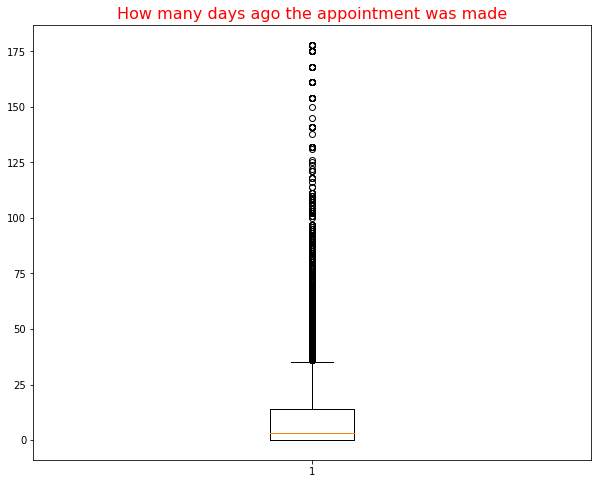

In [29]:
plt.figure(figsize=(10,8))
plt.title('How many days ago the appointment was made',fontsize=16,color='red')
plt.boxplot(med_app.days_diff)
plt.show()

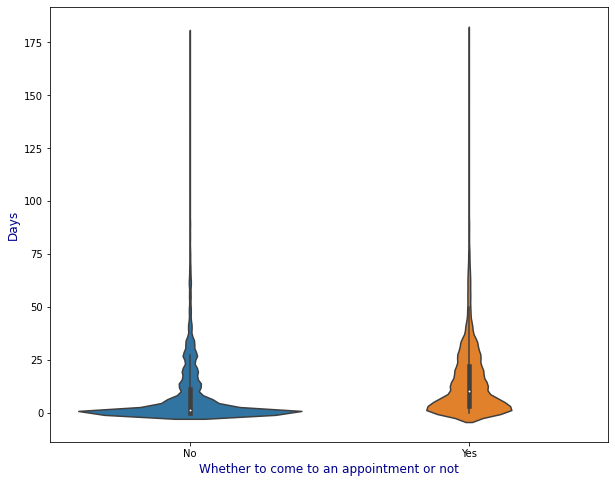

In [30]:
plt.figure(figsize=(10,8))
sns.violinplot(y='days_diff',x='No-show',data=med_app)
plt.ylabel('Days',color='darkblue',fontsize=12);
plt.xlabel('Whether to come to an appointment or not',color='darkblue',fontsize=12);

In [31]:
def daycategories(day):
    if day==0: return "Same Day"
    elif day<8: return "Within First Week"
    elif day<15: return "Within 15 Days"
    elif day<31: return "One Month Before"
    elif day<62: return "Two Months Before"
    else: return "More than Three Months"

In [32]:
med_app['days_diff_cat']=med_app['days_diff'].apply(daycategories)
med_app.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA       False         True   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False        False   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA       False        False   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI       False        False   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False         True   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0        False      No          Friday      April   
1    False      False       0        False      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3    False      False       0        False      No          Friday      April   
4     True      False       0        False      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4          0  weekday       1       0         0   
1            29            4          0  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4          0  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap days_diff_cat  
0         0        0          0   no_handcap      Same Day  
1         0        0          0   no_handcap      Same Day  
2         0        0          0   no_handcap      Same Day  
3         0        0          0   no_handcap      Same Day  
4         0        0          0   no_handcap      Same Day

In [33]:
def same_day(day):
    if day==0: return "Same Day"
    else: return "Other"

In [34]:
med_app['Same_Day']=med_app['days_diff'].apply(same_day)
med_app.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA       False         True   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False        False   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA       False        False   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI       False        False   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False         True   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0        False      No          Friday      April   
1    False      False       0        False      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3    False      False       0        False      No          Friday      April   
4     True      False       0        False      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4          0  weekday       1       0         0   
1            29            4          0  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4          0  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap days_diff_cat  Same_Day  
0         0        0          0   no_handcap      Same Day  Same Day  
1         0        0          0   no_handcap      Same Day  Same Day  
2         0        0          0   no_handcap      Same Day  Same Day  
3         0        0          0   no_handcap      Same Day  Same Day  
4         0        0          0   no_handcap      Same Day  Same Day

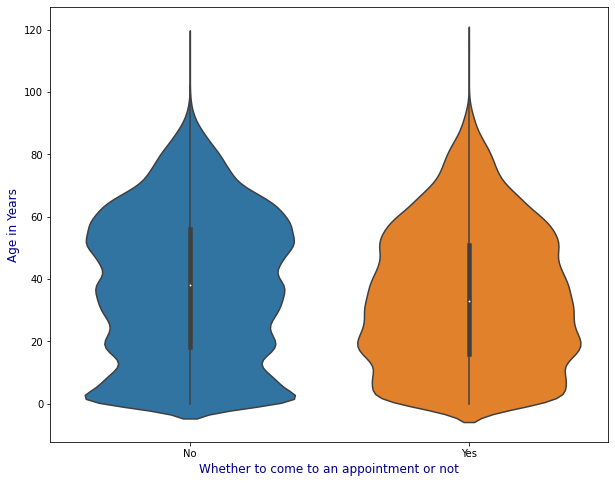

In [35]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Age',x='No-show',data=med_app)
plt.ylabel('Age in Years',color='darkblue',fontsize=12);
plt.xlabel('Whether to come to an appointment or not',color='darkblue',fontsize=12);

In [36]:
def agecategories(age):
    if age<=2: return "Baby"
    elif age<=12: return "Child"
    elif 13<=age<=17: return "Adolescent"
    elif 18<=age<=39: return "Young Adults"
    elif 40<=age<=79: return "Middle-Aged Adults"
    elif age>=80: return "Elderly/Senior"

In [37]:
med_app['age_cat']=med_app['Age'].apply(agecategories)
med_app.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA       False         True   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False        False   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA       False        False   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI       False        False   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA       False         True   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0        False      No          Friday      April   
1    False      False       0        False      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3    False      False       0        False      No          Friday      April   
4     True      False       0        False      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4          0  weekday       1       0         0   
1            29            4          0  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4          0  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap days_diff_cat  Same_Day  \
0         0        0          0   no_handcap      Same Day  Same Day   
1         0        0          0   no_handcap      Same Day  Same Day   
2         0        0          0   no_handcap      Same Day  Same Day   
3         0        0          0   no_handcap      Same Day  Same Day   
4         0        0          0   no_handcap      Same Day  Same Day   

              age_cat  
0  Middle-Aged Adults  
1  Middle-Aged Adults  
2  Middle-Aged Adults  
3               Child  
4  Middle-Aged Adults

In [38]:
med_app=med_app.sort_values(by=['AppointmentDay','PatientId'],ascending=True)
med_app

PatientId  AppointmentID Gender              ScheduledDay  \
1792    2.538665e+08        5563137      M 2016-04-08 15:13:35+00:00   
706     3.183853e+08        5559991      F 2016-04-08 08:22:02+00:00   
1831    4.228613e+08        5638450      F 2016-04-29 08:02:33+00:00   
463     5.228864e+08        5633872      F 2016-04-28 09:58:32+00:00   
117     7.444632e+08        5539219      F 2016-04-01 14:27:30+00:00   
...              ...            ...    ...                       ...   
87416   9.968791e+14        5788799      F 2016-06-08 13:37:02+00:00   
88107   9.975286e+14        5748885      M 2016-05-31 07:20:13+00:00   
89974   9.981913e+14        5786052      F 2016-06-08 07:58:49+00:00   
108643  9.984884e+14        5736934      F 2016-05-25 08:56:09+00:00   
108065  9.997437e+14        5788565      F 2016-06-08 12:55:37+00:00   

                  AppointmentDay  Age      Neighbourhood Scholarship  \
1792   2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False   
706    2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False   
1831   2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True   
463    2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False   
117    2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True   
...                          ...  ...                ...         ...   
87416  2016-06-08 00:00:00+00:00   54     GRANDE VITÓRIA       False   
88107  2016-06-08 00:00:00+00:00   48   ILHA DO PRÍNCIPE       False   
89974  2016-06-08 00:00:00+00:00    4        SANTOS REIS       False   
108643 2016-06-08 00:00:00+00:00   49         BELA VISTA       False   
108065 2016-06-08 00:00:00+00:00   24      SANTO ANTÔNIO       False   

       Hipertension Diabetes Alcoholism Handcap SMS_received No-show  \
1792           True    False      False       0         True      No   
706           False    False      False       0         True      No   
1831          False    False      False       0        False      No   
463            True     True      False       0        False     Yes   
117           False    False      False       0         True      No   
...             ...      ...        ...     ...          ...     ...   
87416         False     True      False       0        False      No   
88107         False    False       True       0         True      No   
89974         False    False      False       0        False      No   
108643        False    False      False       0         True      No   
108065        False    False      False       0        False      No   

       dayname_of_week month_name  day_of_month  day_of_week  days_diff  \
1792            Friday      April            29            4         20   
706             Friday      April            29            4         20   
1831            Friday      April            29            4          0   
463             Friday      April            29            4          0   
117             Friday      April            29            4         27   
...                ...        ...           ...          ...        ...   
87416        Wednesday       June             8            2          0   
88107        Wednesday       June             8            2          7   
89974        Wednesday       June             8            2          0   
108643       Wednesday       June             8            2         13   
108065       Wednesday       June             8            2          0   

        weekday  Friday  Monday  Saturday  Thursday  Tuesday  Wednesday  \
1792    weekday       1       0         0         0        0          0   
706     weekday       1       0         0         0        0          0   
1831    weekday       1       0         0         0        0          0   
463     weekday       1       0         0         0        0          0   
117     weekday       1       0         0         0        0          0   
...         ...     ...     ...       ...       ...      ...     

In [39]:
more_app_same_day=med_app.groupby(['PatientId','AppointmentDay'])['AppointmentID'].count().reset_index()
more_app_same_day

med_app=pd.merge(med_app,more_app_same_day,on=['PatientId','AppointmentDay'],how='inner')

In [40]:
med_app2=pd.DataFrame(med_app.drop_duplicates(subset=['PatientId','AppointmentDay'],keep='first',inplace=False,ignore_index=False))
med_app2.head()

PatientId  AppointmentID_x Gender              ScheduledDay  \
0  253866521.0          5563137      M 2016-04-08 15:13:35+00:00   
1  318385314.0          5559991      F 2016-04-08 08:22:02+00:00   
2  422861257.0          5638450      F 2016-04-29 08:02:33+00:00   
3  522886422.0          5633872      F 2016-04-28 09:58:32+00:00   
4  744463183.0          5539219      F 2016-04-01 14:27:30+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False         True   
1 2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False        False   
2 2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True        False   
3 2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False         True   
4 2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True        False   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0         True      No          Friday      April   
1    False      False       0         True      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3     True      False       0        False     Yes          Friday      April   
4    False      False       0         True      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4         20  weekday       1       0         0   
1            29            4         20  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4         27  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap     days_diff_cat  Same_Day  \
0         0        0          0   no_handcap  One Month Before     Other   
1         0        0          0   no_handcap  One Month Before     Other   
2         0        0          0   no_handcap          Same Day  Same Day   
3         0        0          0   no_handcap          Same Day  Same Day   
4         0        0          0   no_handcap  One Month Before     Other   

              age_cat  AppointmentID_y  
0  Middle-Aged Adults                1  
1        Young Adults                1  
2        Young Adults                1  
3  Middle-Aged Adults                1  
4        Young Adults                1

In [41]:
pd.crosstab(index=med_app2['AppointmentID_y'],columns='count')

col_0            count
AppointmentID_y       
1                94323
2                 6531
3                  739
4                  157
5                   33
6                   18
8                    1
10                   1

In [42]:
def more_app(num_app):
    if num_app==1: return 'One Appointment'
    elif num_app==2: return 'Two Appointments on Same Day'
    elif num_app==3: return 'Three Appointments on Same Day'
    elif num_app>=4: return 'Four or More Appointments on Same Day'

In [43]:
med_app2['Number_of_Appointments']=med_app2['AppointmentID_y'].apply(more_app)
med_app2.head()

PatientId  AppointmentID_x Gender              ScheduledDay  \
0  253866521.0          5563137      M 2016-04-08 15:13:35+00:00   
1  318385314.0          5559991      F 2016-04-08 08:22:02+00:00   
2  422861257.0          5638450      F 2016-04-29 08:02:33+00:00   
3  522886422.0          5633872      F 2016-04-28 09:58:32+00:00   
4  744463183.0          5539219      F 2016-04-01 14:27:30+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False         True   
1 2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False        False   
2 2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True        False   
3 2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False         True   
4 2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True        False   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0         True      No          Friday      April   
1    False      False       0         True      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3     True      False       0        False     Yes          Friday      April   
4    False      False       0         True      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4         20  weekday       1       0         0   
1            29            4         20  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4         27  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap     days_diff_cat  Same_Day  \
0         0        0          0   no_handcap  One Month Before     Other   
1         0        0          0   no_handcap  One Month Before     Other   
2         0        0          0   no_handcap          Same Day  Same Day   
3         0        0          0   no_handcap          Same Day  Same Day   
4         0        0          0   no_handcap  One Month Before     Other   

              age_cat  AppointmentID_y Number_of_Appointments  
0  Middle-Aged Adults                1        One Appointment  
1        Young Adults                1        One Appointment  
2        Young Adults                1        One Appointment  
3  Middle-Aged Adults                1        One Appointment  
4        Young Adults                1        One Appointment

In [44]:
med_app2['comes_first']=med_app2.groupby('PatientId')['AppointmentDay'].shift()
med_app2.head()


PatientId  AppointmentID_x Gender              ScheduledDay  \
0  253866521.0          5563137      M 2016-04-08 15:13:35+00:00   
1  318385314.0          5559991      F 2016-04-08 08:22:02+00:00   
2  422861257.0          5638450      F 2016-04-29 08:02:33+00:00   
3  522886422.0          5633872      F 2016-04-28 09:58:32+00:00   
4  744463183.0          5539219      F 2016-04-01 14:27:30+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False         True   
1 2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False        False   
2 2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True        False   
3 2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False         True   
4 2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True        False   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0         True      No          Friday      April   
1    False      False       0         True      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3     True      False       0        False     Yes          Friday      April   
4    False      False       0         True      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4         20  weekday       1       0         0   
1            29            4         20  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4         27  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap     days_diff_cat  Same_Day  \
0         0        0          0   no_handcap  One Month Before     Other   
1         0        0          0   no_handcap  One Month Before     Other   
2         0        0          0   no_handcap          Same Day  Same Day   
3         0        0          0   no_handcap          Same Day  Same Day   
4         0        0          0   no_handcap  One Month Before     Other   

              age_cat  AppointmentID_y Number_of_Appointments comes_first  
0  Middle-Aged Adults                1        One Appointment         NaT  
1        Young Adults                1        One Appointment         NaT  
2        Young Adults                1        One Appointment         NaT  
3  Middle-Aged Adults                1        One Appointment         NaT  
4        Young Adults                1        One Appointment         NaT

In [45]:
med_app2['visits_diff']=(med_app2['AppointmentDay'] - med_app2['comes_first']) / np.timedelta64(1,'D')
med_app2.head()

PatientId  AppointmentID_x Gender              ScheduledDay  \
0  253866521.0          5563137      M 2016-04-08 15:13:35+00:00   
1  318385314.0          5559991      F 2016-04-08 08:22:02+00:00   
2  422861257.0          5638450      F 2016-04-29 08:02:33+00:00   
3  522886422.0          5633872      F 2016-04-28 09:58:32+00:00   
4  744463183.0          5539219      F 2016-04-01 14:27:30+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False         True   
1 2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False        False   
2 2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True        False   
3 2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False         True   
4 2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True        False   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0         True      No          Friday      April   
1    False      False       0         True      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3     True      False       0        False     Yes          Friday      April   
4    False      False       0         True      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4         20  weekday       1       0         0   
1            29            4         20  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4         27  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap     days_diff_cat  Same_Day  \
0         0        0          0   no_handcap  One Month Before     Other   
1         0        0          0   no_handcap  One Month Before     Other   
2         0        0          0   no_handcap          Same Day  Same Day   
3         0        0          0   no_handcap          Same Day  Same Day   
4         0        0          0   no_handcap  One Month Before     Other   

              age_cat  AppointmentID_y Number_of_Appointments comes_first  \
0  Middle-Aged Adults                1        One Appointment         NaT   
1        Young Adults                1        One Appointment         NaT   
2        Young Adults                1        One Appointment         NaT   
3  Middle-Aged Adults                1        One Appointment         NaT   
4        Young Adults                1        One Appointment         NaT   

   visits_diff  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [46]:
med_app2['visits_diff']=med_app2['visits_diff'].replace(np.nan,9999)

In [47]:
def firstvisit(app):
    if app==9999: return 'First Visit to Hospital'
    else: return 'Re-Visit to Hospital'

In [48]:
med_app2['is_First_visit']=med_app2['visits_diff'].apply(firstvisit)
med_app2.head()

PatientId  AppointmentID_x Gender              ScheduledDay  \
0  253866521.0          5563137      M 2016-04-08 15:13:35+00:00   
1  318385314.0          5559991      F 2016-04-08 08:22:02+00:00   
2  422861257.0          5638450      F 2016-04-29 08:02:33+00:00   
3  522886422.0          5633872      F 2016-04-28 09:58:32+00:00   
4  744463183.0          5539219      F 2016-04-01 14:27:30+00:00   

             AppointmentDay  Age      Neighbourhood Scholarship Hipertension  \
0 2016-04-29 00:00:00+00:00   53     BENTO FERREIRA       False         True   
1 2016-04-29 00:00:00+00:00   31  JESUS DE NAZARETH       False        False   
2 2016-04-29 00:00:00+00:00   30         CRUZAMENTO        True        False   
3 2016-04-29 00:00:00+00:00   66      SÃO CRISTÓVÃO       False         True   
4 2016-04-29 00:00:00+00:00   34      SANTO ANTÔNIO        True        False   

  Diabetes Alcoholism Handcap SMS_received No-show dayname_of_week month_name  \
0    False      False       0         True      No          Friday      April   
1    False      False       0         True      No          Friday      April   
2    False      False       0        False      No          Friday      April   
3     True      False       0        False     Yes          Friday      April   
4    False      False       0         True      No          Friday      April   

   day_of_month  day_of_week  days_diff  weekday  Friday  Monday  Saturday  \
0            29            4         20  weekday       1       0         0   
1            29            4         20  weekday       1       0         0   
2            29            4          0  weekday       1       0         0   
3            29            4          0  weekday       1       0         0   
4            29            4         27  weekday       1       0         0   

   Thursday  Tuesday  Wednesday have_handcap     days_diff_cat  Same_Day  \
0         0        0          0   no_handcap  One Month Before     Other   
1         0        0          0   no_handcap  One Month Before     Other   
2         0        0          0   no_handcap          Same Day  Same Day   
3         0        0          0   no_handcap          Same Day  Same Day   
4         0        0          0   no_handcap  One Month Before     Other   

              age_cat  AppointmentID_y Number_of_Appointments comes_first  \
0  Middle-Aged Adults                1        One Appointment         NaT   
1        Young Adults                1        One Appointment         NaT   
2        Young Adults                1        One Appointment         NaT   
3  Middle-Aged Adults                1        One Appointment         NaT   
4        Young Adults                1        One Appointment         NaT   

   visits_diff           is_First_visit  
0       9999.0  First Visit to Hospital  
1       9999.0  First Visit to Hospital  
2       9999.0  First Visit to Hospital  
3       9999.0  First Visit to Hospital  
4       9999.0  First Visit to Hospital

In [49]:
med_app2['visits_diff']=med_app2['visits_diff'].replace(9999,np.nan)
med_app2['visits_diff'].describe()

count    39505.000000
mean        10.328718
std          8.654095
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         40.000000
Name: visits_diff, dtype: float64

In [50]:
pd.crosstab(index=med_app2['is_First_visit'],columns='count')

col_0                    count
is_First_visit                
First Visit to Hospital  62298
Re-Visit to Hospital     39505

# **Data Visualization & Multivariate Analysis**
---

In [51]:
pd.crosstab(index=med_app2['No-show'],columns='count')

col_0    count
No-show       
No       81383
Yes      20420

## **BarPlot of 'No-Show'**
---

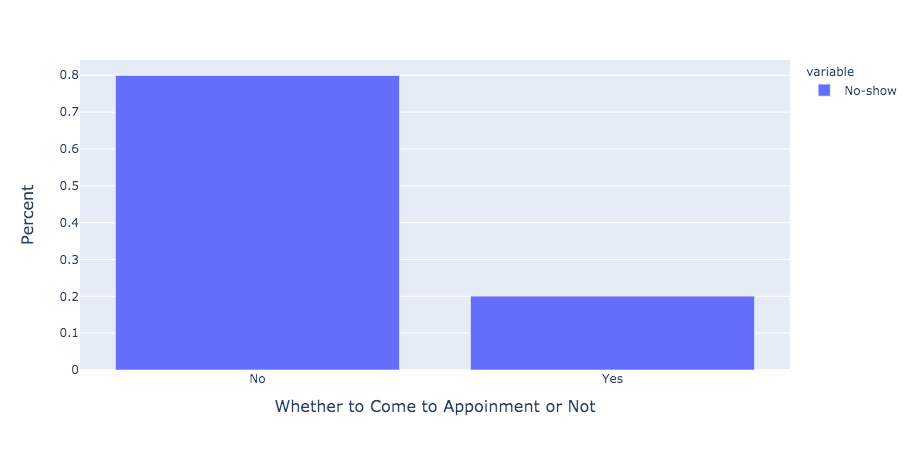

In [52]:
fig=px.bar(med_app2['No-show'].value_counts()/len(med_app2))


fig.update_layout(xaxis={'title':'Whether to Come to Appoinment or Not',
                         'titlefont_size':16},
                 yaxis={'title':'Percent',
                         'titlefont_size':16},
                 barmode='relative')
fig.show()

## **'No-Show' * 'Gender'**
---

Gender               
Gender       F      M     All
No-show                      
No       52.23  27.72   79.94
Yes      13.21   6.84   20.06
All      65.44  34.56  100.00

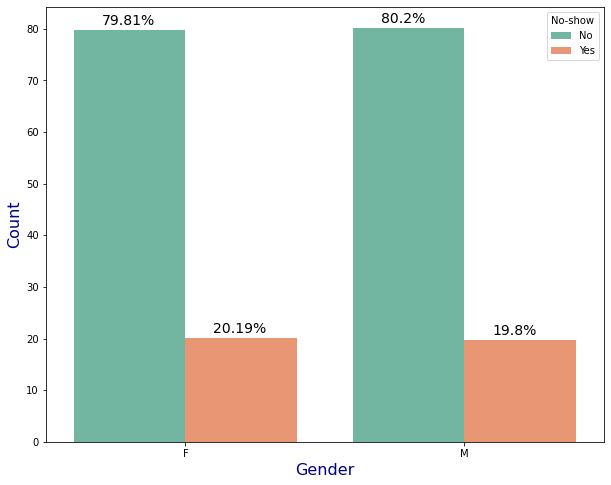

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    2.1614
1                    p-value =    0.1415
2               Cramer's phi =    0.0046

In [53]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Gender'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Gender'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Gender',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Age'**
---

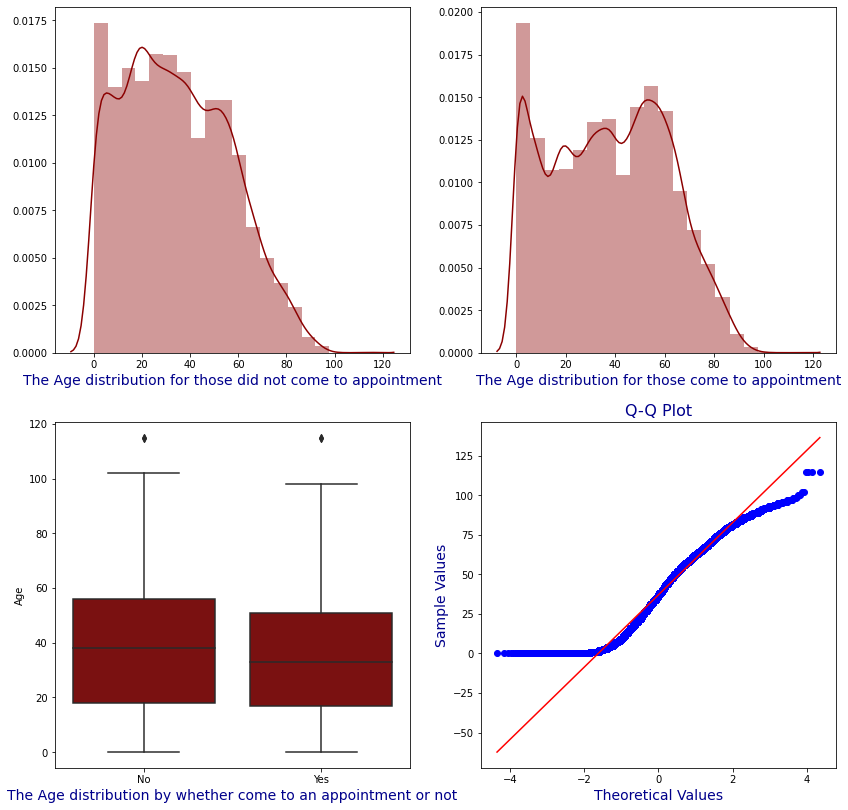

variable  jarque_bera_stats  jarque_bera_p_value
0  Age-NoShow[Yes]         807.569851                  0.0
1   Age-NoShow[No]        3467.320408                  0.0

----------------------------------------------------------------------------------------------------
Mann-Whitney U test results of Age in terms of whether come to appointment or not is: 0.0000
----------------------------------------------------------------------------------------------------


In [54]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
sns.distplot(med_app2[med_app2['No-show']=='Yes'].Age, kde=True, bins=20, color = 'darkred')
plt.xlabel('The Age distribution for those did not come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,2)
sns.distplot(med_app2[med_app2['No-show']=='No'].Age, kde=True, bins=20, color = 'darkred')
plt.xlabel('The Age distribution for those come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(y='Age', x='No-show', data=med_app2, color = 'darkred')
plt.xlabel('The Age distribution by whether come to an appointment or not',color='darkblue',fontsize=14)

plt.subplot(2,2,4)
res=stats.probplot(med_app2['Age'],plot=plt)
plt.title('Q-Q Plot',color="darkblue",fontsize=16)
plt.xlabel('Theoretical Values', color="darkblue",fontsize=14)
plt.ylabel('Sample Values',color="darkblue",fontsize=14)
plt.show()

distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

jb_stats = jarque_bera(med_app2[med_app2['No-show']=='Yes'].Age)
distribution_tests = distribution_tests.append({"variable": 'Age-NoShow[Yes]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
jb_stats = jarque_bera(med_app2[med_app2['No-show']=='No'].Age)
distribution_tests = distribution_tests.append({"variable": 'Age-NoShow[No]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
display(distribution_tests)

MannWhitney_age_noshow=stats.mannwhitneyu(med_app2[med_app2['No-show']=='Yes'].Age,med_app2[med_app2['No-show']=='No'].Age)

print("----"*25)
print("Mann-Whitney U test results of Age in terms of whether come to appointment or not is: {:.4f}".
      format(MannWhitney_age_noshow[1]))
print("----"*25)

age_cat                                                 \
age_cat Adolescent  Baby  Child Elderly/Senior Middle-Aged Adults   
No-show                                                             
No            4.19  5.72   9.71           2.56              35.77   
Yes           1.49  1.20   2.65           0.48               7.53   
All           5.68  6.92  12.35           3.05              43.30   

                              
age_cat Young Adults     All  
No-show                       
No             21.99   79.94  
Yes             6.71   20.06  
All            28.70  100.00

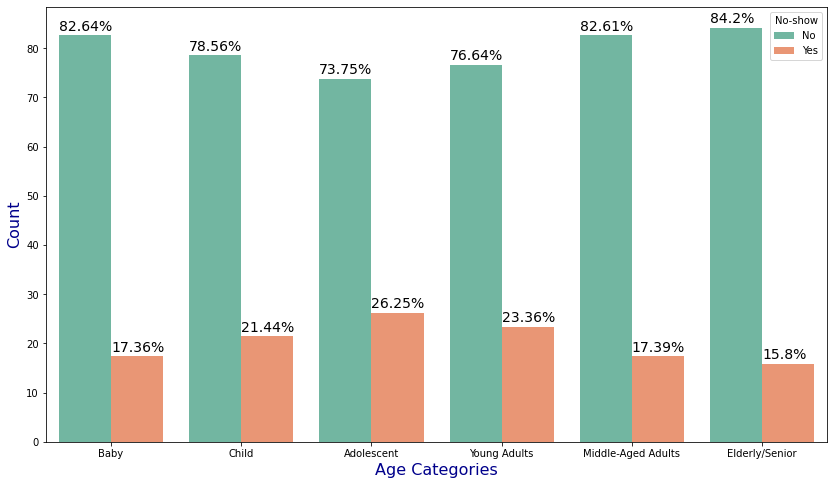

Chi-square test   results
0  Pearson Chi-square ( 5.0) =   615.1734
1                    p-value =     0.0000
2                 Cramer's V =     0.0777

In [55]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['age_cat'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','age_cat'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(14,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", 
                 order=['Baby','Child','Adolescent','Young Adults','Middle-Aged Adults','Elderly/Senior'],
                 data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Age Categories',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)

plt.show()

display(test_results)

## **'No-Show' * 'Scholarship'**
---

Scholarship              
Scholarship       False  True     All
No-show                              
No                72.48  7.46   79.94
Yes               17.76  2.30   20.06
All               90.23  9.77  100.00

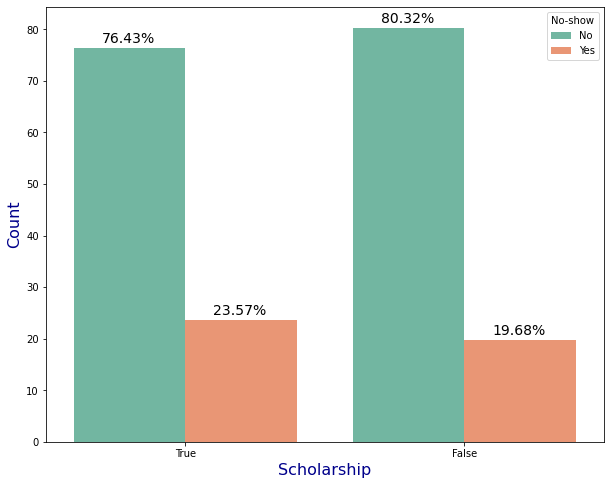

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   84.5742
1                    p-value =    0.0000
2               Cramer's phi =    0.0288

In [56]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Scholarship'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Scholarship'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", order=['True','False'],data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Scholarship',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Hipertension'**
---

Hipertension               
Hipertension        False   True     All
No-show                                 
No                  63.50  16.44   79.94
Yes                 16.67   3.39   20.06
All                 80.17  19.83  100.00

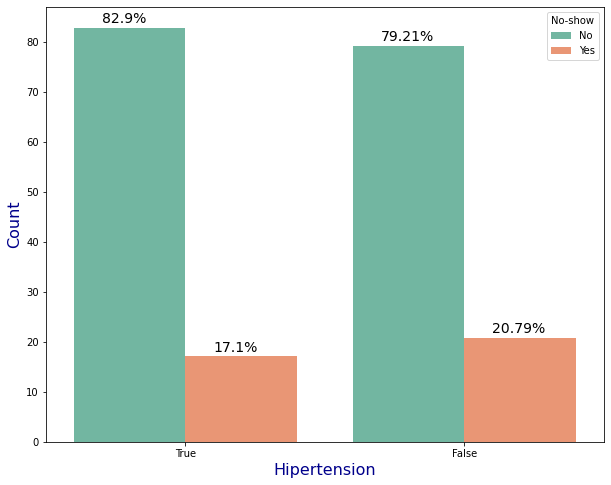

Chi-square test   results
0  Pearson Chi-square ( 1.0) =   137.5084
1                    p-value =     0.0000
2               Cramer's phi =     0.0368

In [57]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Hipertension'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Hipertension'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", order=['True','False'], data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Hipertension',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Diabetes'**
---

Diabetes              
Diabetes    False  True     All
No-show                        
No          73.97  5.97   79.94
Yes         18.77  1.29   20.06
All         92.74  7.26  100.00

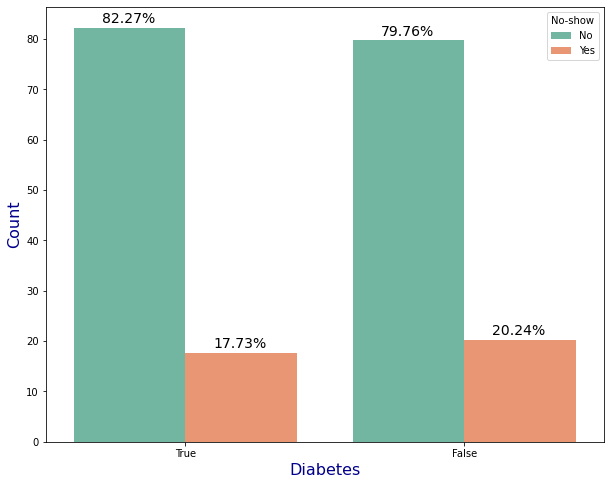

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   26.8986
1                    p-value =    0.0000
2               Cramer's phi =    0.0163

In [58]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Diabetes'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Diabetes'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", order=['True','False'], data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Diabetes',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Alcoholism'**
---

Alcoholism              
Alcoholism      False  True     All
No-show                            
No              77.77  2.17   79.94
Yes             19.46  0.59   20.06
All             97.24  2.76  100.00

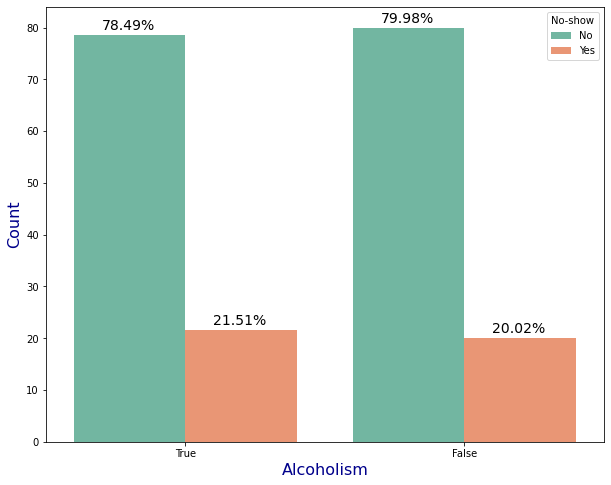

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.8264
1                    p-value =    0.0505
2               Cramer's phi =    0.0061

In [59]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Alcoholism'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Alcoholism'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2",order=['True','False'], data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Alcoholism',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Handcap'**
---

have_handcap                   
have_handcap having_handcap no_handcap     All
No-show                                       
No                     1.64      78.30   79.94
Yes                    0.34      19.72   20.06
All                    1.98      98.02  100.00

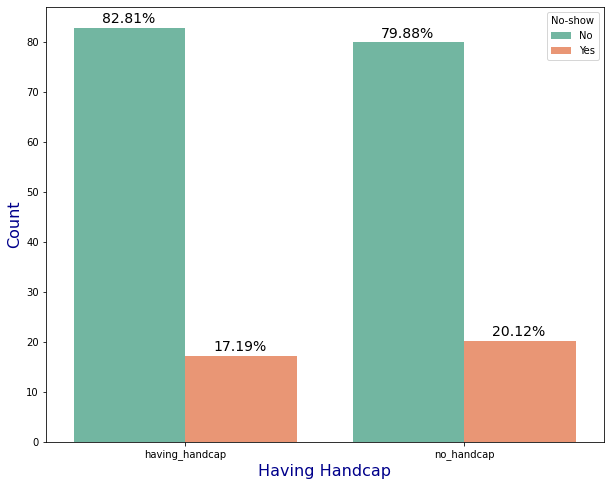

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   10.5496
1                    p-value =    0.0012
2               Cramer's phi =    0.0102

In [60]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['have_handcap'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','have_handcap'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Having Handcap',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'SMS_received'**
---

SMS_received               
SMS_received        False   True     All
No-show                                 
No                  55.58  24.36   79.94
Yes                 10.87   9.18   20.06
All                 66.45  33.55  100.00

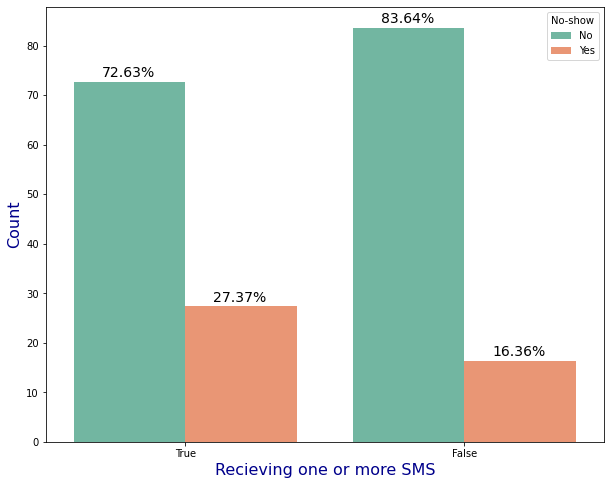

Chi-square test    results
0  Pearson Chi-square ( 1.0) =   1715.6187
1                    p-value =      0.0000
2               Cramer's phi =      0.1298

In [61]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['SMS_received'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','SMS_received'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", order=['True','False'],data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Recieving one or more SMS',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Day'**
---

dayname_of_week                                             \
dayname_of_week          Friday Monday Saturday Thursday Tuesday Wednesday   
No-show                                                                      
No                        13.43  16.27     0.03    12.70   18.70     18.81   
Yes                        3.60   4.25     0.01     3.03    4.61      4.55   
All                       17.03  20.53     0.04    15.73   23.31     23.37   

                         
dayname_of_week     All  
No-show                  
No                79.94  
Yes               20.06  
All              100.00

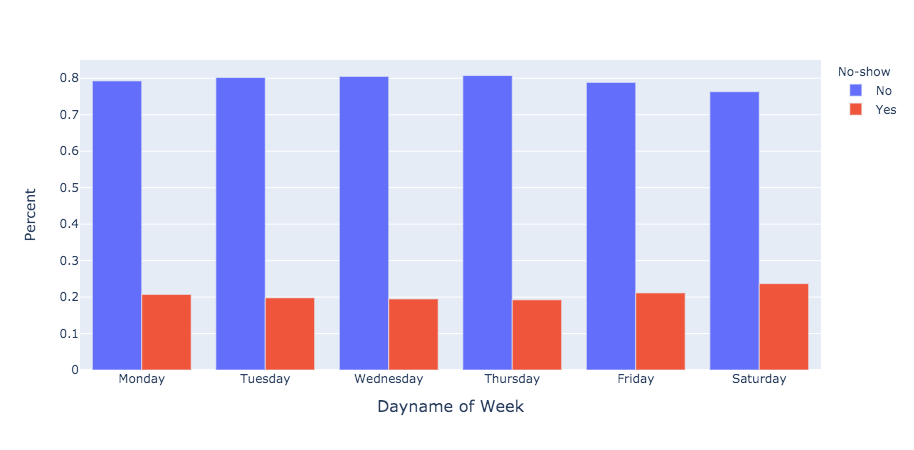

In [62]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['dayname_of_week'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','dayname_of_week'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['Percent']
df1=df1.reset_index()
df1

fig=px.bar(df1,x='dayname_of_week',y='Percent',color='No-show', barmode='group')

fig.update_layout(xaxis={'categoryorder':'array', 
                         'categoryarray':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                         'title':'Dayname of Week',
                         'titlefont_size':16})
fig.show()

weekday                
weekday weekday weekend     All
No-show                        
No        79.91    0.03   79.94
Yes       20.05    0.01   20.06
All       99.96    0.04  100.00

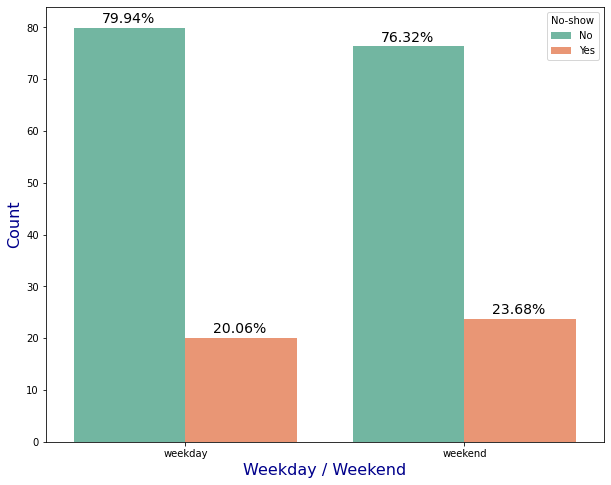

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.3117
1                    p-value =    0.5767
2               Cramer's phi =    0.0017

In [63]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['weekday'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','weekday'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", data=df1)
plt.ylabel('Count',color='darkblue',fontsize=16)
plt.xlabel('Weekday / Weekend',color='darkblue',fontsize=16)


for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Month'**
---

month_name                      
month_name      April   June    May     All
No-show                                    
No               2.36  19.59  57.99   79.94
Yes              0.56   4.36  15.13   20.06
All              2.93  23.95  73.12  100.00

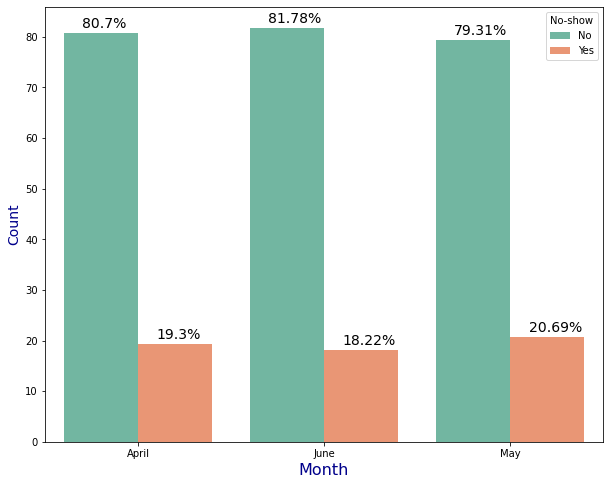

Chi-square test  results
0  Pearson Chi-square ( 2.0) =   71.1403
1                    p-value =    0.0000
2                 Cramer's V =    0.0264

In [64]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['month_name'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','month_name'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", data=df1)
plt.ylabel('Count',color='darkblue',fontsize=14)
plt.xlabel('Month',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Days Before Appointment'**
---

count    101803.000000
mean          9.621956
std          15.085357
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_diff, dtype: float64

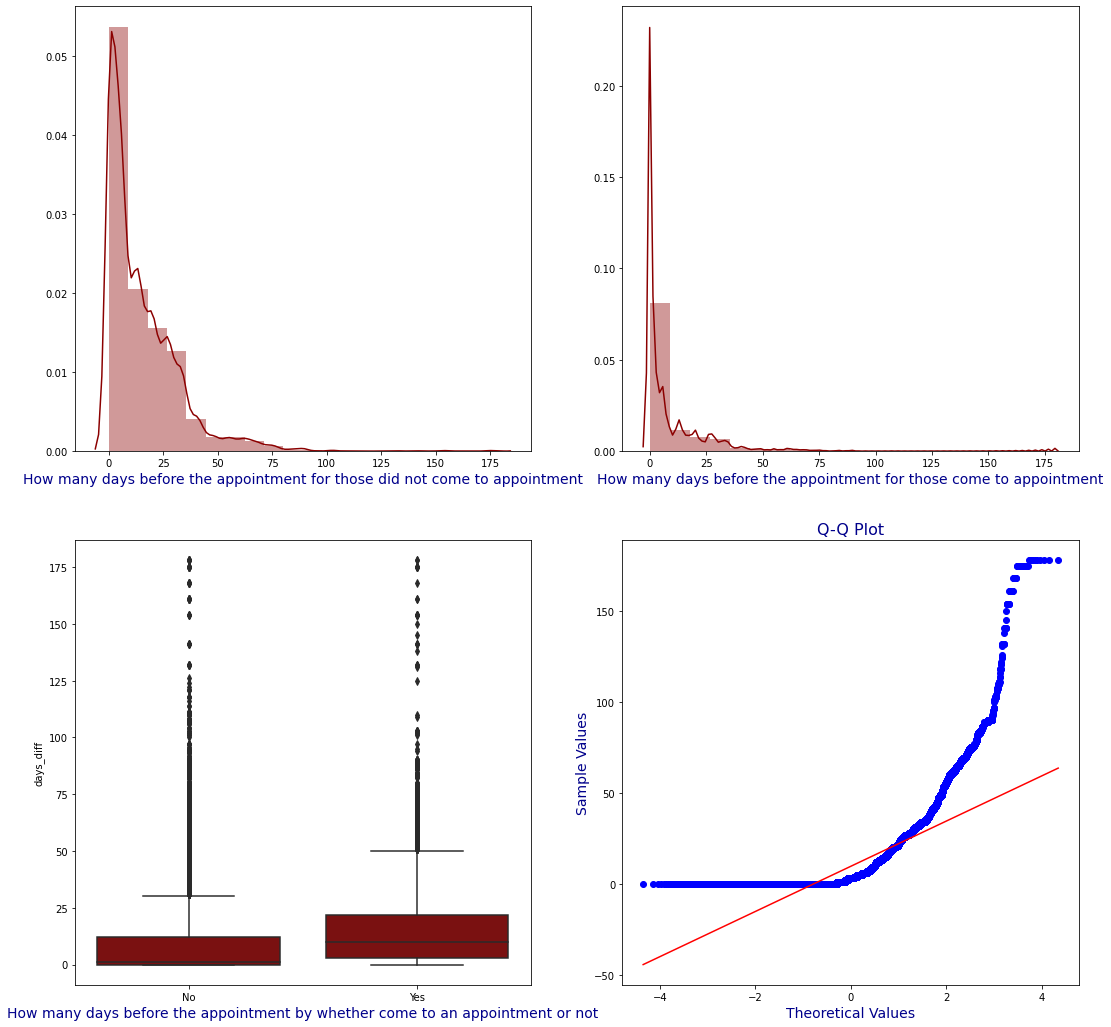

variable  jarque_bera_stats  jarque_bera_p_value
0  Days_Diff-NoShow[Yes]       95617.322678                  0.0
1   Days_Diff-NoShow[No]      875497.700787                  0.0

--------------------------------------------------------------------------------------------------------
Mann-Whitney U test results of days before appointment in terms of whether come to appointment or not is: 0.0000
--------------------------------------------------------------------------------------------------------


In [65]:
display(med_app2.days_diff.describe())

plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
sns.distplot(med_app2[med_app2['No-show']=='Yes'].days_diff, kde=True, bins=20, color = 'darkred')
plt.xlabel('How many days before the appointment for those did not come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,2)
sns.distplot(med_app2[med_app2['No-show']=='No'].days_diff, kde=True, bins=20, color = 'darkred')
plt.xlabel('How many days before the appointment for those come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(y='days_diff', x='No-show', data=med_app2, color = 'darkred')
plt.xlabel('How many days before the appointment by whether come to an appointment or not',color='darkblue',fontsize=14)

plt.subplot(2,2,4)
res=stats.probplot(med_app2['days_diff'],plot=plt)
plt.title('Q-Q Plot',color="darkblue",fontsize=16)
plt.xlabel('Theoretical Values', color="darkblue",fontsize=14)
plt.ylabel('Sample Values',color="darkblue",fontsize=14)
plt.show()

distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

jb_stats = jarque_bera(med_app2[med_app2['No-show']=='Yes'].days_diff)
distribution_tests = distribution_tests.append({"variable": 'Days_Diff-NoShow[Yes]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
jb_stats = jarque_bera(med_app2[med_app2['No-show']=='No'].days_diff)
distribution_tests = distribution_tests.append({"variable": 'Days_Diff-NoShow[No]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
display(distribution_tests)


#ttest_daysdiff_noshow=stats.ttest_ind(med_app2[med_app2['No-show']=='Yes'].days_diff,med_app2[med_app2['No-show']=='No'].days_diff)
MannWhitney_daysdiff_noshow=stats.mannwhitneyu(med_app2[med_app2['No-show']=='Yes'].days_diff,med_app2[med_app2['No-show']=='No'].days_diff)
print("----"*26)
print("Mann-Whitney U test results of days before appointment in terms of whether come to appointment or not is: {:.4f}".
      format(MannWhitney_daysdiff_noshow[1]))
print("----"*26)

days_diff_cat                            \
days_diff_cat More than Three Months One Month Before Same Day   
No-show                                                          
No                              1.16            10.25    36.12   
Yes                             0.48             4.85     2.43   
All                             1.63            15.10    38.54   

                                                                          
days_diff_cat Two Months Before Within 15 Days Within First Week     All  
No-show                                                                   
No                         4.79           7.07             20.55   79.94  
Yes                        2.41           3.15              6.74   20.06  
All                        7.20          10.23             27.30  100.00

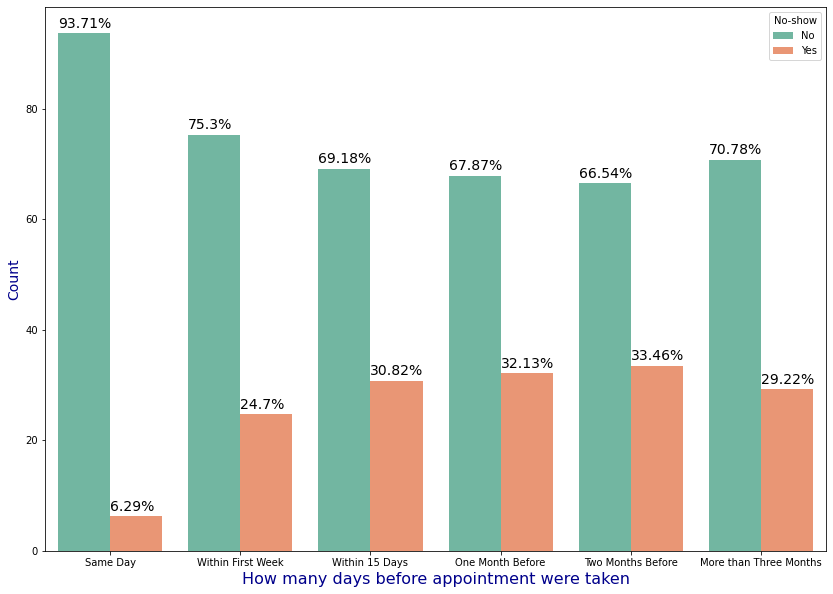

Chi-square test    results
0  Pearson Chi-square ( 5.0) =   8066.6400
1                    p-value =      0.0000
2                 Cramer's V =      0.2815

In [66]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['days_diff_cat'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','days_diff_cat'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()


plt.figure(figsize=(14,10))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2",
                 order=['Same Day','Within First Week','Within 15 Days','One Month Before','Two Months Before','More than Three Months'],
                 data=df1)
plt.ylabel('Count',color='darkblue',fontsize=14)
plt.xlabel('How many days before appointment were taken',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Same Day-Appointment Day'**
---

Same_Day                 
Same_Day    Other Same Day     All
No-show                           
No          43.83    36.12   79.94
Yes         17.63     2.43   20.06
All         61.46    38.54  100.00

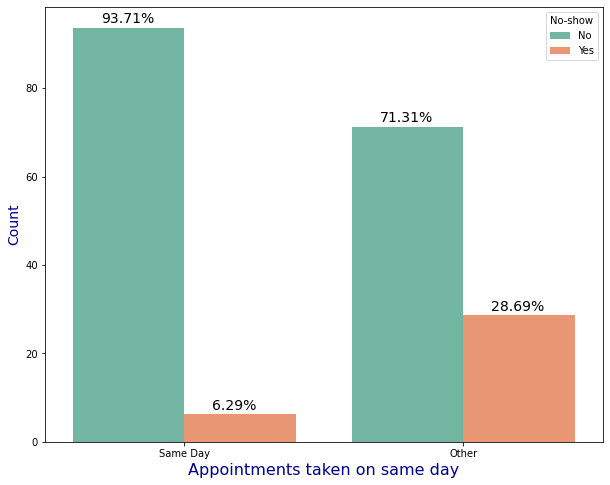

Chi-square test    results
0  Pearson Chi-square ( 1.0) =   7544.4158
1                    p-value =      0.0000
2               Cramer's phi =      0.2722

In [67]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Same_Day'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Same_Day'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(10,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", order=['Same Day','Other'],data=df1)
plt.ylabel('Count',color='darkblue',fontsize=14)
plt.xlabel('Appointments taken on same day',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'Number of Appointments on Same Day'**
---

In [68]:
pd.crosstab(med_app2['No-show'],med_app2['Number_of_Appointments'])

Number_of_Appointments  Four or More Appointments on Same Day  \
No-show                                                         
No                                                        175   
Yes                                                        35   

Number_of_Appointments  One Appointment  Three Appointments on Same Day  \
No-show                                                                   
No                                75580                             590   
Yes                               18743                             149   

Number_of_Appointments  Two Appointments on Same Day  
No-show                                               
No                                              5038  
Yes                                             1493

Number_of_Appointments                  \
Number_of_Appointments Four or More Appointments on Same Day One Appointment   
No-show                                                                        
No                                                      0.17           74.24   
Yes                                                     0.03           18.41   
All                                                     0.21           92.65   

                                                       \
Number_of_Appointments Three Appointments on Same Day   
No-show                                                 
No                                               0.58   
Yes                                              0.15   
All                                              0.73   

                                                             
Number_of_Appointments Two Appointments on Same Day     All  
No-show                                                      
No                                             4.95   79.94  
Yes                                            1.47   20.06  
All                                            6.42  100.00

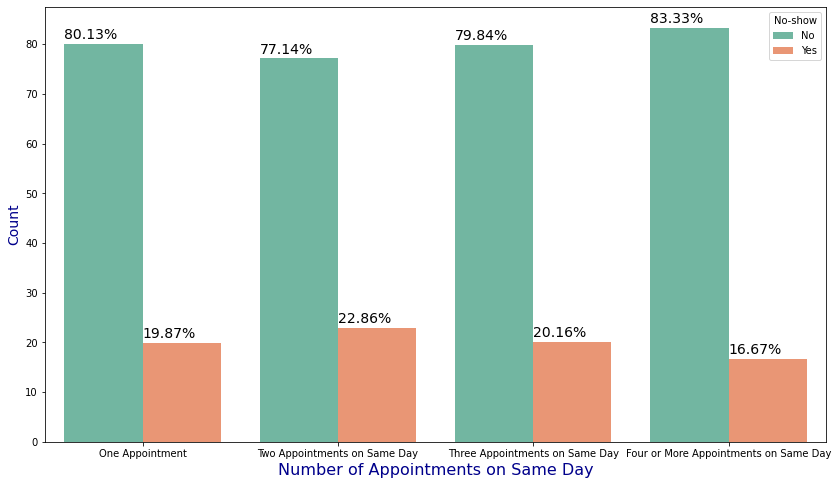

Chi-square test  results
0  Pearson Chi-square ( 3.0) =   35.5489
1                    p-value =    0.0000
2                 Cramer's V =    0.0187

In [69]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['Number_of_Appointments'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','Number_of_Appointments'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(14,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", 
                 order=['One Appointment','Two Appointments on Same Day','Three Appointments on Same Day','Four or More Appointments on Same Day'],data=df1)
plt.ylabel('Count',color='darkblue',fontsize=14)
plt.xlabel('Number of Appointments on Same Day',color='darkblue',fontsize=16)

for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

## **'No-Show' * 'First Visit to Hospital or Not'**
---

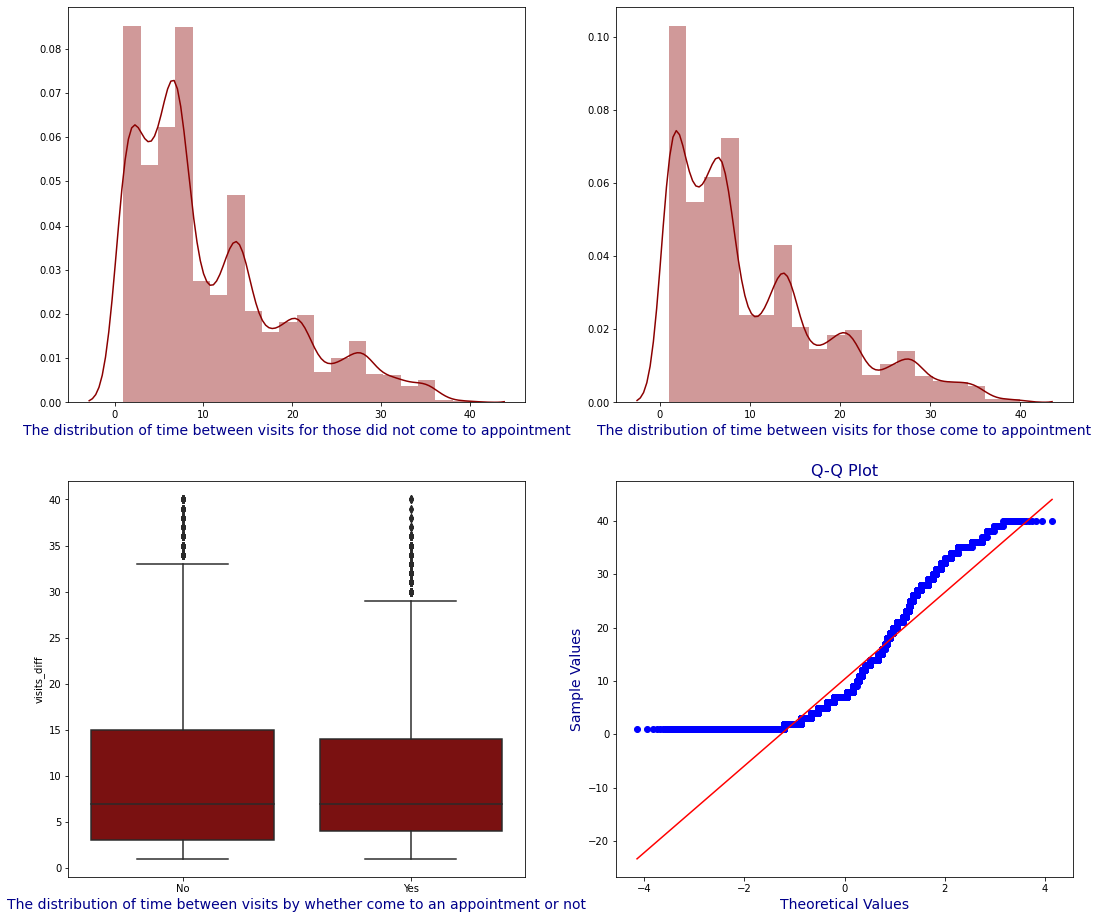

variable  jarque_bera_stats  jarque_bera_p_value
0  TimeBetweenVisits-NoShow[Yes]        1667.510104                  0.0
1   TimeBetweenVisits-NoShow[No]        6029.902233                  0.0

----------------------------------------------------------------------------------------------------
Mann-Whitney U test results of time between visits in terms of whether come to appointment or not is: 0.0000
----------------------------------------------------------------------------------------------------


In [70]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.distplot(med_app2[med_app2['No-show']=='Yes'].visits_diff, kde=True, bins=20, color = 'darkred')
plt.xlabel('The distribution of time between visits for those did not come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,2)
sns.distplot(med_app2[med_app2['No-show']=='No'].visits_diff, kde=True, bins=20, color = 'darkred')
plt.xlabel('The distribution of time between visits for those come to appointment',color='darkblue',fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(y='visits_diff', x='No-show', data=med_app2, color = 'darkred')
plt.xlabel('The distribution of time between visits by whether come to an appointment or not',color='darkblue',fontsize=14)

plt.subplot(2,2,4)
res=stats.probplot(med_app2['visits_diff'].dropna(),plot=plt)
plt.title('Q-Q Plot',color="darkblue",fontsize=16)
plt.xlabel('Theoretical Values', color="darkblue",fontsize=14)
plt.ylabel('Sample Values',color="darkblue",fontsize=14)
plt.show()

distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value'])

jb_stats = jarque_bera(med_app2[med_app2['No-show']=='Yes'].visits_diff.dropna())
distribution_tests = distribution_tests.append({"variable": 'TimeBetweenVisits-NoShow[Yes]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
jb_stats = jarque_bera(med_app2[med_app2['No-show']=='No'].visits_diff.dropna())
distribution_tests = distribution_tests.append({"variable": 'TimeBetweenVisits-NoShow[No]',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1]
                                               }, ignore_index=True)
display(distribution_tests)

MannWhitney_visitsdiff_noshow=stats.mannwhitneyu(med_app2[med_app2['No-show']=='Yes'].visits_diff,med_app2[med_app2['No-show']=='No'].visits_diff)

print("----"*25)
print("Mann-Whitney U test results of time between visits in terms of whether come to appointment or not is: {:.4f}".
      format(MannWhitney_visitsdiff_noshow[1]))
print("----"*25)

is_First_visit                             
is_First_visit First Visit to Hospital Re-Visit to Hospital     All
No-show                                                            
No                               49.44                30.50   79.94
Yes                              11.75                 8.30   20.06
All                              61.19                38.81  100.00

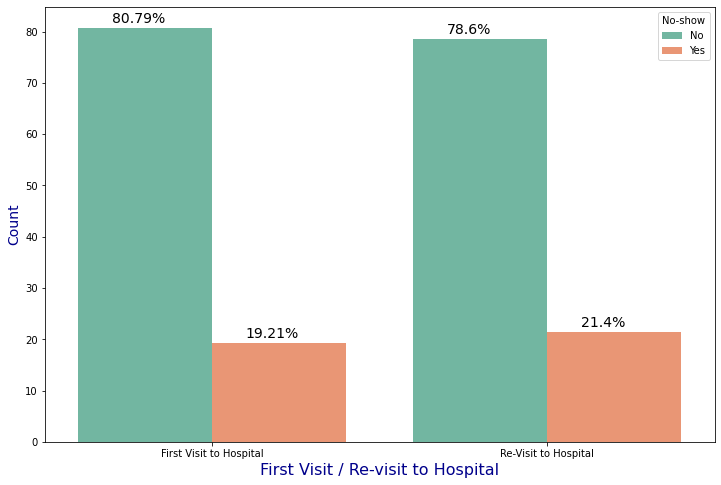

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   72.4495
1                    p-value =    0.0000
2               Cramer's phi =    0.0267

In [71]:
crosstab, test_results, expected = rp.crosstab(med_app2['No-show'],med_app2['is_First_visit'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
display(crosstab)

x,y='No-show','is_First_visit'
df1=pd.DataFrame(med_app2.groupby(y)[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()

plt.figure(figsize=(12,8))
g_ax=sns.barplot(x=y,y='percent',hue=x, palette="Set2", data=df1)
plt.ylabel('Count',color='darkblue',fontsize=14)
plt.xlabel('First Visit / Re-visit to Hospital',color='darkblue',fontsize=16)


for p in g_ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()+0.1
    txt_y=p.get_height()+1
    g_ax.text(txt_x,txt_y,txt,fontsize=14)
plt.show()

display(test_results)

# **More Data Visualization**
---

## **'No-Show' * 'Age' * 'Gender'**
---

Gender             age_cat No-show    percent
0       F          Adolescent      No  73.960674
1       F          Adolescent     Yes  26.039326
2       F                Baby      No  82.553318
3       F                Baby     Yes  17.446682
4       F               Child      No  78.361695
5       F               Child     Yes  21.638305
6       F      Elderly/Senior      No  84.190656
7       F      Elderly/Senior     Yes  15.809344
8       F  Middle-Aged Adults      No  82.434260
9       F  Middle-Aged Adults     Yes  17.565740
10      F        Young Adults      No  76.576831
11      F        Young Adults     Yes  23.423169
12      M          Adolescent      No  73.405211
13      M          Adolescent     Yes  26.594789
14      M                Baby      No  82.724796
15      M                Baby     Yes  17.275204
16      M               Child      No  78.745062
17      M               Child     Yes  21.254938
18      M      Elderly/Senior      No  84.215886
19      M      Elderly/Senior     Yes  15.784114
20      M  Middle-Aged Adults      No  82.992012
21      M  Middle-Aged Adults     Yes  17.007988
22      M        Young Adults      No  76.791551
23      M        Young Adults     Yes  23.208449

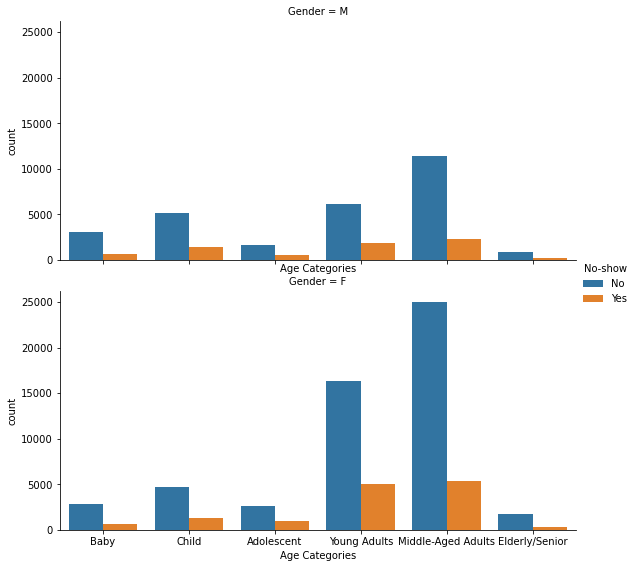

In [72]:

x,y,z='No-show','Gender','age_cat'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1)                

fig=sns.catplot(x=z, hue=x, row=y, data=med_app2, 
            order=['Baby','Child','Adolescent','Young Adults','Middle-Aged Adults','Elderly/Senior'],
            kind="count",height=4,aspect=2)
fig.set(xlabel="Age Categories")
plt.show()


## **'No-Show' * 'Age' * 'SMS Received'**
---

SMS_received             age_cat No-show    percent
0         False          Adolescent      No  77.561219
1         False          Adolescent     Yes  22.438781
2         False                Baby      No  86.478228
3         False                Baby     Yes  13.521772
4         False               Child      No  82.059801
5         False               Child     Yes  17.940199
6         False      Elderly/Senior      No  85.638999
7         False      Elderly/Senior     Yes  14.361001
8         False  Middle-Aged Adults      No  85.205954
9         False  Middle-Aged Adults     Yes  14.794046
10        False        Young Adults      No  82.187268
11        False        Young Adults     Yes  17.812732
12         True          Adolescent      No  65.190583
13         True          Adolescent     Yes  34.809417
14         True                Baby      No  71.546961
15         True                Baby     Yes  28.453039
16         True               Child      No  71.456123
17         True               Child     Yes  28.543877
18         True      Elderly/Senior      No  80.218447
19         True      Elderly/Senior     Yes  19.781553
20         True  Middle-Aged Adults      No  77.668049
21         True  Middle-Aged Adults     Yes  22.331951
22         True        Young Adults      No  66.586515
23         True        Young Adults     Yes  33.413485

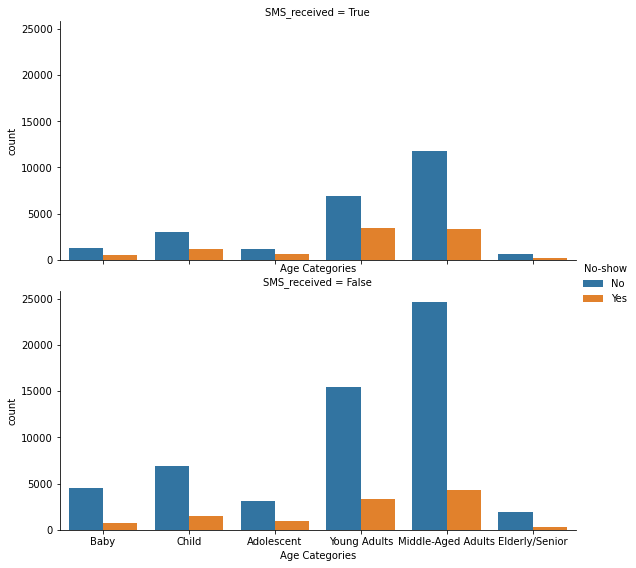

In [73]:

x,y,z='No-show','SMS_received','age_cat'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1) 
fig=sns.catplot(x=z, hue=x, row=y, data=med_app2, kind="count",
            order=['Baby','Child','Adolescent','Young Adults','Middle-Aged Adults','Elderly/Senior'],
            height=4,aspect=2)
fig.set(xlabel="Age Categories")
plt.show()

## **'No-Show' * 'SMS Received' * 'Gender'**
---

SMS_received Gender No-show    percent
0        False      F      No  83.790955
1        False      F     Yes  16.209045
2        False      M      No  83.357328
3        False      M     Yes  16.642672
4         True      F      No  72.391426
5         True      F     Yes  27.608574
6         True      M      No  73.126092
7         True      M     Yes  26.873908

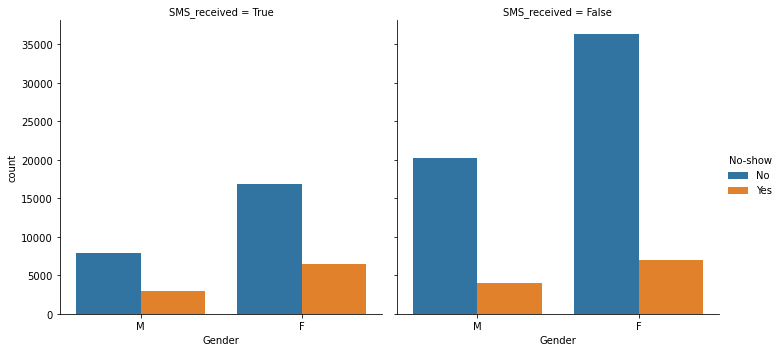

In [74]:
x,y,z='No-show','SMS_received','Gender'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1) 
sns.catplot(x=z, hue=x, col=y, data=med_app2, kind="count")
plt.show()

## **'No-Show' * 'SMS received' * 'Dayname of Week'**
---

SMS_received dayname_of_week No-show    percent
0         False          Friday      No  80.618231
1         False          Friday     Yes  19.381769
2         False          Monday      No  82.412884
3         False          Monday     Yes  17.587116
4         False        Saturday      No  76.000000
5         False        Saturday     Yes  24.000000
6         False        Thursday      No  84.435043
7         False        Thursday     Yes  15.564957
8         False         Tuesday      No  85.967471
9         False         Tuesday     Yes  14.032529
10        False       Wednesday      No  84.711286
11        False       Wednesday     Yes  15.288714
12         True          Friday      No  73.067393
13         True          Friday     Yes  26.932607
14         True          Monday      No  72.858392
15         True          Monday     Yes  27.141608
16         True        Saturday      No  76.923077
17         True        Saturday     Yes  23.076923
18         True        Thursday      No  71.817402
19         True        Thursday     Yes  28.182598
20         True         Tuesday      No  72.326417
21         True         Tuesday     Yes  27.673583
22         True       Wednesday      No  73.014388
23         True       Wednesday     Yes  26.985612

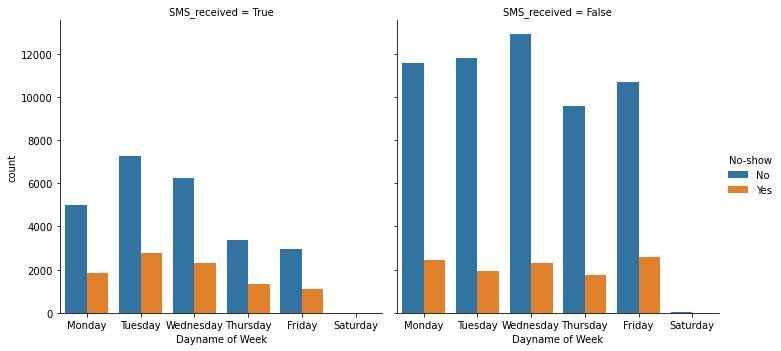

In [75]:
x,y,z='No-show','SMS_received','dayname_of_week'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1)

fig=sns.catplot(x=z, hue=x, col=y, data=med_app2, kind="count",
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
fig.set(xlabel="Dayname of Week")
plt.show()

## **'No-Show' * 'SMS received' * 'Month'**
---

SMS_received month_name No-show    percent
0         False      April      No  85.147392
1         False      April     Yes  14.852608
2         False       June      No  87.831156
3         False       June     Yes  12.168844
4         False        May      No  82.497707
5         False        May     Yes  17.502293
6          True      April      No  74.238683
7          True      April     Yes  25.761317
8          True       June      No  74.212907
9          True       June     Yes  25.787093
10         True        May      No  71.758799
11         True        May     Yes  28.241201

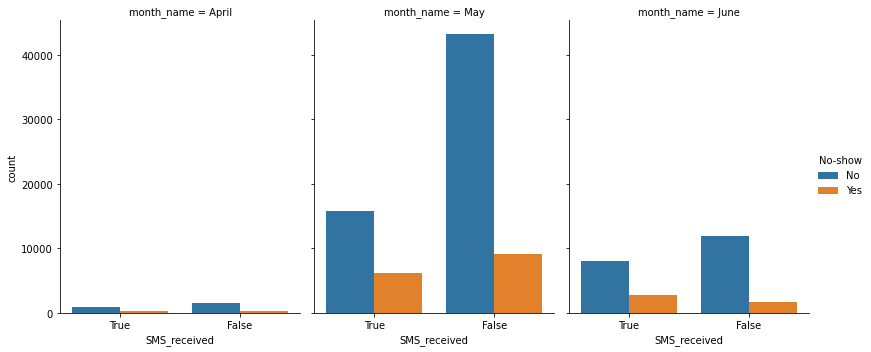

In [76]:
x,y,z='No-show','SMS_received','month_name'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1)

sns.catplot(x=y, hue=x, col=z, data=med_app2, kind="count",height=5,aspect=0.75)
plt.show()

## **'No-Show' * 'SMS received' * 'Days Before Appointment'**
---

SMS_received           days_diff_cat No-show    percent
0         False  More than Three Months      No  67.266776
1         False  More than Three Months     Yes  32.733224
2         False        One Month Before      No  63.608141
3         False        One Month Before     Yes  36.391859
4         False                Same Day      No  93.707310
5         False                Same Day     Yes   6.292690
6         False       Two Months Before      No  61.532508
7         False       Two Months Before     Yes  38.467492
8         False          Within 15 Days      No  65.545216
9         False          Within 15 Days     Yes  34.454784
10        False       Within First Week      No  74.696343
11        False       Within First Week     Yes  25.303657
12         True  More than Three Months      No  72.813688
13         True  More than Three Months     Yes  27.186312
14         True        One Month Before      No  70.458581
15         True        One Month Before     Yes  29.541419
16         True       Two Months Before      No  69.263158
17         True       Two Months Before     Yes  30.736842
18         True          Within 15 Days      No  71.635311
19         True          Within 15 Days     Yes  28.364689
20         True       Within First Week      No  76.023252
21         True       Within First Week     Yes  23.976748

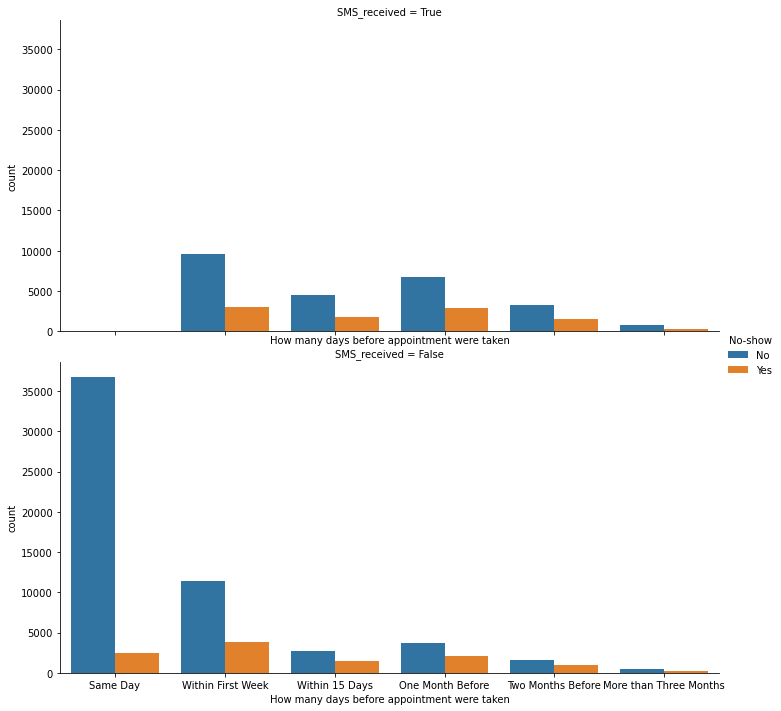

In [77]:
x,y,z='No-show','SMS_received','days_diff_cat'
df1=pd.DataFrame(med_app2.groupby([y,z])[x].value_counts(normalize=True))
df1.columns = ['percent']
df1=df1.mul(100)
df1=df1.reset_index()
display(df1)

fig=sns.catplot(x=z, hue=x, row=y, data=med_app2, kind="count",
           order=['Same Day','Within First Week','Within 15 Days','One Month Before','Two Months Before','More than Three Months'],
           height=5,aspect=2)
fig.set(xlabel='How many days before appointment were taken')
plt.show()

<html lang="en">
<body>
<p>
<font face="verdana" size=“6" color="red" ><b><u> CONCLUSION:</b></u></font>
<\p>                                                         
 <p>
    <ol>
      <font face="verdana" size="4" color="blue">
      <li> 79.81% of women and 80.2% of men did not come to their appointment. There was no statistically significant difference gender in terms of coming to the appointment or not. </li>       
      <li> There was statistically significant difference between coming to the appointment or not in terms of age distribution.</li>
      <li> The senior adults are the first among  those who did not come to their appointments. The babies were the second.</li>
      <li> There was statistically difference between having hypertension or diabetes and whether to come to the appointment or not. However most of the people who had any chronic disease did not come to their appointments.</li>
      <li> Approximately two thirds of the patients (72.63%) did not come to their appointment even if they received SMS. </li>     
      <li> It could not been found remarkable difference between days in terms of whether to attend the appointment or not.</li>
      <li> Almost all of the appointments were scheduled on the weekdays.
 </li>
      <li> There was statistically significant difference between coming to the appointment or not in terms of how many days ago the appointment date is taken.
 </li>
      <li> The vast majority of patients who did not come to their appointment made their appointment on the same day.</li>
      <li> There was significantly difference between coming to the appointment or not in terms of number of appointments taken on same day.  </li>
      <li> A statistically significant difference was found between whether the patient visited the hospital for the first time or not and whether coming to the appointment or not.
 </li>
     </font></ol><\p>
</body>
</html>